# Introduction

Problem Summary:
The assignment involves developing and comparing two types of machine learning models – a Decision Tree and a Random Forest – to predict the level of Regents diploma awards among various student subgroups in New York State school districts. The dataset provides a detailed view of graduation statistics, segmented by different categorizations and subgroupings, across NY State school districts for the 2018-2019 school year. The primary goal is to predict a new categorical variable that classifies the percentage of Regents diplomas awarded into three categories: low, medium, and high, based on the relationship with the median percentage of all Regents diplomas awarded.

Steps to Address the Problem:
1. **Exploratory Data Analysis (EDA)**:
* Assess the dataset's overall structure, quality, and distribution.
* Identify any anomalies, missing values, or inconsistencies in the data.
* Perform statistical summaries and visualizations to understand the data's characteristics and underlying patterns.
2. **Data Preparation**:
* Clean the data by handling missing values and incorrect data types, especially for numerical columns stored as objects.
* Create the target variable by categorizing the reg_pct attribute into three classes (low, medium, high) based on the specified criteria.
* Encode categorical variables and normalize/standardize numerical variables as necessary.
3. **Prepped Data Review**:
* Conduct a second round of EDA on the prepared dataset.
* Verify the integrity of the data post-preparation and ensure it's suitable for modeling.
4. **Decision Tree and Random Forest Modeling**:
* Develop a Decision Tree model and a Random Forest model using the prepared dataset.
* Select relevant features and fine-tune hyperparameters to optimize model performance.
* Evaluate the models using appropriate metrics to assess their prediction accuracy and generalization capability.
5. **Model Selection and Evaluation**:
* Compare the performance of the Decision Tree and Random Forest models.
* Select the preferred model based on a balance of accuracy, interpretability, and complexity.
* Apply the chosen model to a testing subset to evaluate its real-world applicability and performance.
6. **Conclusions**:
* Summarize the findings from the model comparisons.
* Discuss the implications of the model's performance and potential areas for further research or improvement.

## Data Load

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/M11%20Decision%20tree%20and%20random%20forest/M11_Data.csv")
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [3]:
# Examine the dataset's size to grasp its scale
print(f"Dataset size: {df.shape}")

Dataset size: (73152, 19)


# 1. Exploratory Data Analysis (EDA)

In [4]:
# Generate summary statistics for numerical columns
print(df.describe())
print(df.info())

       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code  
count   73152.000000  
mean       12.000930  
std         7.213138  
min         1.000000  
25%         6.000000  
50%        11.000000  
75%        18.000000  
max        25.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  

### The summary statistics provide an overview of the numerical features in the dataset:
* aggregation_index is a constant value of 3 across the dataset, indicating a single level of aggregation.
* nrc_code varies from 1 to 6, suggesting different types of school districts.
* county_code ranges from 1 to 68, indicating a wide geographical coverage.
* nyc_ind is a binary indicator, with about 5.5% of the records indicating NYC schools.
* subgroup_code shows a wide range of values, implying various subgroup categorizations within the dataset.
* The percentage columns such as reg_adv_pct, non_diploma_credential_pct, still_enr_pct, ged_pct, and dropout_pct have been successfully converted to float and show a wide range of values, indicating variability in school performance and outcomes.

In [5]:
# Identify missing values across the dataset
missing_values = df.isnull().sum()
print(missing_values)

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64


In [6]:
# Convert percentages to floats for analysis
def pct_to_float(x):
    try:
        return float(x.strip('%')) / 100
    except:
        return None

In [7]:
# Apply conversion to all percentage columns
pct_columns = [col for col in df.columns if 'pct' in col]
for col in pct_columns:
    df[col] = df[col].apply(pct_to_float)
    
# for col in pct_columns:
#     df[col] = df[col].apply(lambda x: None if x == "-" else pct_to_float(x))

# First, let's identify columns that are not already in a numeric format and convert them.
cnt_columns = [col for col in df.columns if 'cnt' in col]

# Attempt to convert these columns to float, replacing non-convertible values with NaN to handle any '-' entries or similar
for col in cnt_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Re-check for missing values after ensuring "-" values in 'cnt' and 'pct' columns are treated as NaN.
print(df.isnull().sum())

report_school_year        0
aggregation_index         0
aggregation_type          0
aggregation_name          0
nrc_code                  0
nrc_desc                  0
county_code               0
county_name               0
nyc_ind                   0
membership_desc           0
subgroup_code             0
subgroup_name             0
enroll_cnt            33478
grad_cnt              33478
grad_pct              33478
reg_cnt               33478
reg_pct               33478
dropout_cnt           33478
dropout_pct           33478
dtype: int64


In [8]:
df.fillna(0, inplace=True)

In [9]:
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,0.71,310.0,0.47,148.0,0.22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,0.76,169.0,0.52,65.0,0.20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,0.65,141.0,0.42,83.0,0.25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0.0,0.0,0.00,0.0,0.00,0.0,0.00
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,0.68,183.0,0.50,91.0,0.25


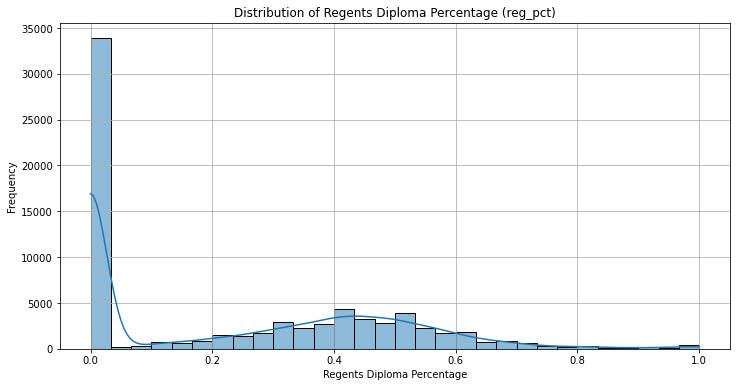

In [10]:
# Visualize the distribution of dropout counts
plt.figure(figsize=(12, 6))
sns.histplot(df['reg_pct'].dropna(), bins=30, kde=True)
plt.title('Distribution of Regents Diploma Percentage (reg_pct)')
plt.xlabel('Regents Diploma Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of Regents Pecentage
1. Skewness: The distribution is highly right-skewed, indicating that a large number of the observations have a Regents Diploma Percentage close to 0. This means that for many of the observations, a relatively small percentage of students were awarded a Regents diploma.

2. Frequency: The highest frequency falls in the first bin, which is the interval just above 0%. This suggests that there is a significant number of school districts or subgroups where very few students achieve a Regents diploma.

3. Outliers or Low Frequency at Higher Percentages: As the percentage increases, the frequency of the observations decreases. There are very few observations with a high Regents Diploma Percentage close to 1 (or 100%).

4. Mode of the Distribution: The mode of the distribution (the most frequent value) is in the lowest bin. There is no other prominent peak, indicating that there isn't another common Regents Diploma Percentage among the observations apart from the very low percentages.

5. Potential Impact on Analysis: The skewness of the distribution could impact statistical analyses and model performance. Many models assume normal distribution of variables, and so transformations might be necessary for some types of analysis or modeling. Additionally, the low occurrence of high Regents Diploma Percentages could suggest rarity or difficulty in achieving this outcome, which might be an area of interest for further investigation.

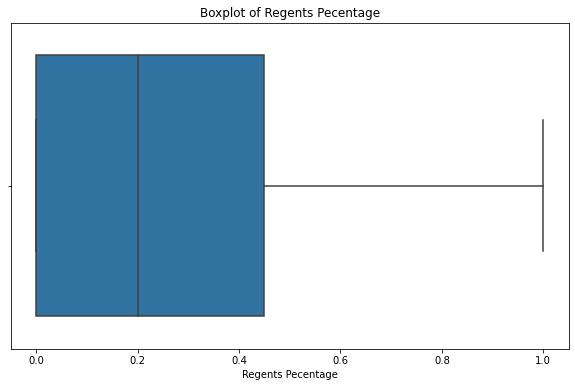

In [11]:
# Boxplot for 'dropout_cnt' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['reg_pct'].dropna())
plt.title('Boxplot of Regents Pecentage')
plt.xlabel('Regents Pecentage')
plt.show()

1. Median: The median (the line inside the box) is near the lower quartile of the box, which suggests that the median Regents Diploma Percentage is low, aligning with the right-skewed distribution observed in the histogram.

2. Interquartile Range (IQR): The box, which represents the middle 50% of the data (from the first quartile to the third quartile), is relatively narrow and skewed towards the lower end of the scale. This indicates that the middle 50% of the data are clustered within a small range of low Regents Diploma Percentages.

3. Outliers: There appear to be no visible outliers above the upper whisker, suggesting that there are no data points that are exceptionally higher than the rest.

4. Whiskers: The whiskers (the lines extending from the box) indicate the range of the data, excluding outliers. The upper whisker extends much farther than the lower, again indicating a right-skewed distribution. It suggests that while the majority of the Regents Diploma Percentages are low, there is a range of percentages that reach towards the higher end, though they are less frequent.

5. Variability: The narrow box suggests that there isn't a large variability in the middle 50% of the data points for the Regents Diploma Percentage. Most of the variability in the dataset comes from the lower and upper extremes.

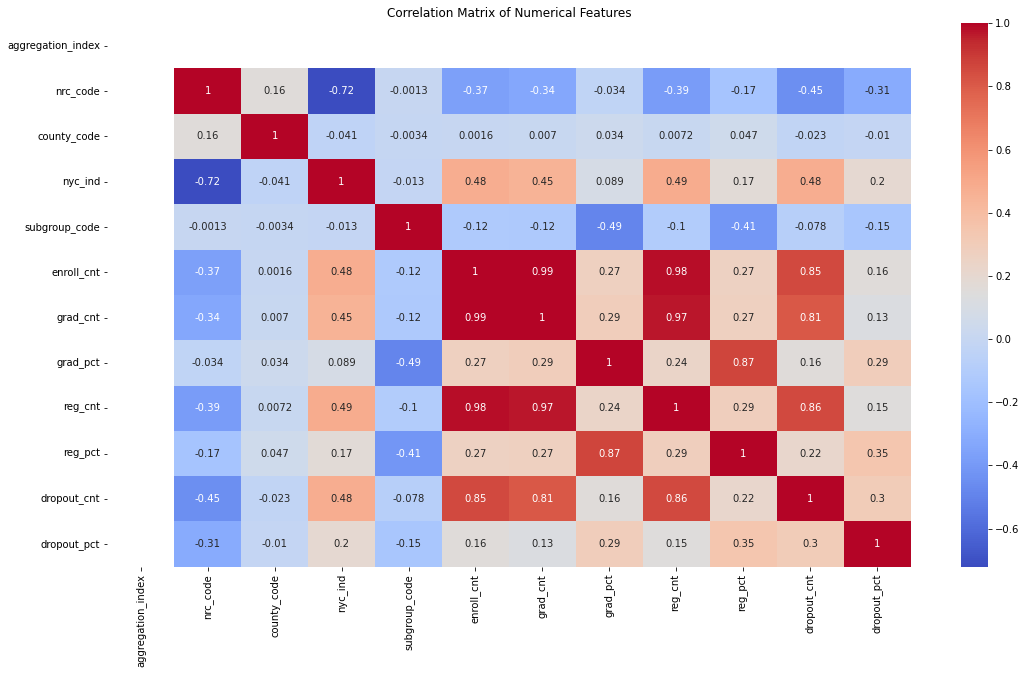

In [12]:
# Correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

1. Correlation with nyc_ind: reg_pct has a moderate negative correlation with nyc_ind (approximately -0.41), suggesting that Regents diploma percentages tend to be lower in NYC districts compared to districts outside of NYC.

2. Correlation with enroll_cnt and dropout_cnt: There are also moderate positive correlations with enroll_cnt (approximately 0.27) and dropout_cnt (approximately 0.22), indicating that higher enrollment counts and dropout counts tend to be associated with higher percentages of Regents diplomas, which may seem counterintuitive and warrants further investigation.

3. Strong Correlation with grad_cnt: reg_pct is highly positively correlated with grad_cnt (nearly 0.87), which is logical as you would expect more graduates to result in a higher percentage of Regents diplomas.

4. Weak Correlation with county_code and subgroup_code: There is a weak positive correlation with county_code (around 0.047) and a weak negative correlation with subgroup_code (around -0.1), suggesting that these features have less direct association with the percentage of Regents diplomas.

5. Implications for Modeling: In predictive modeling, grad_cnt would likely be a strong predictor for reg_pct. However, due to the high correlation, one must be cautious of multicollinearity if both are used in a model.

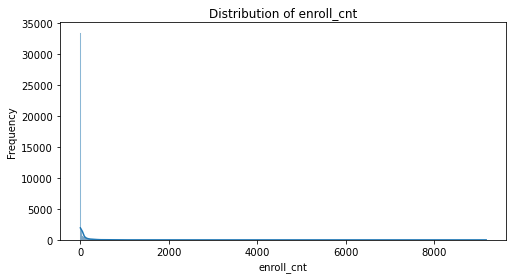

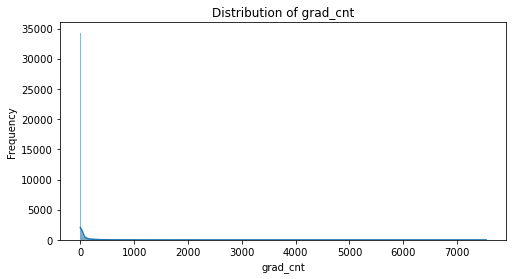

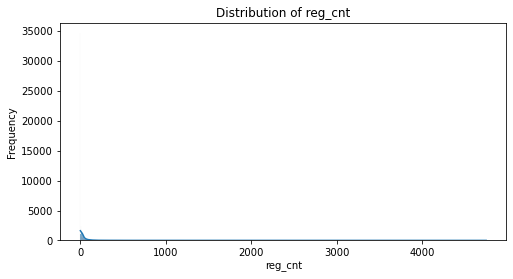

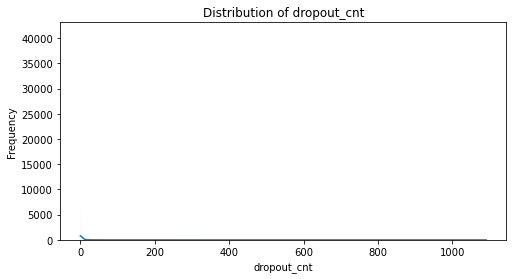

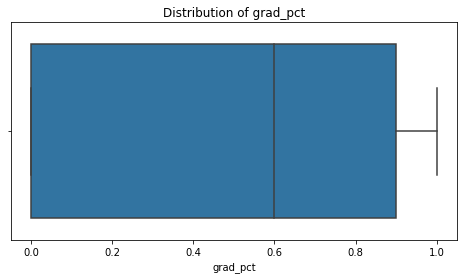

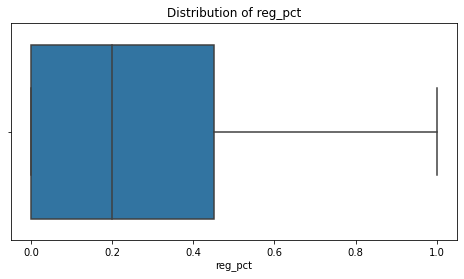

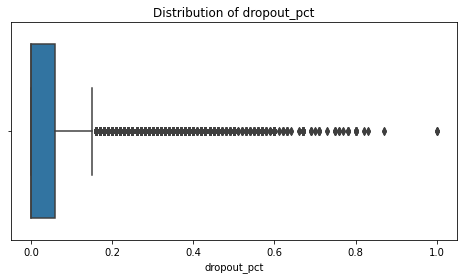

In [13]:
# Histograms for all 'cnt' columns to check distribution
for col in cnt_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)  # Drop NaN values for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for 'pct' columns to check distribution and outliers
for col in pct_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

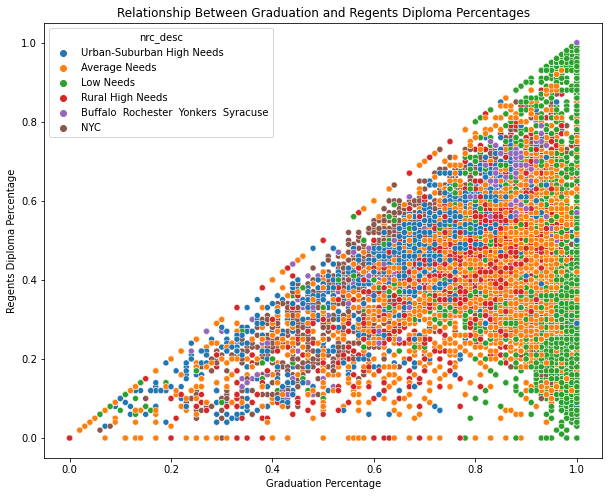

In [14]:
# Exploring the relationship between graduation and regents diploma percentages
plt.figure(figsize=(10, 8))
sns.scatterplot(x='grad_pct', y='reg_pct', hue='nrc_desc', data=df)
plt.title('Relationship Between Graduation and Regents Diploma Percentages')
plt.xlabel('Graduation Percentage')
plt.ylabel('Regents Diploma Percentage')
plt.show()

1. Overall Trend: There is a clear positive correlation between graduation percentages and Regents diploma percentages; as one increases, so does the other. This is indicated by the clustering of data points along a line that moves from the bottom left to the top right of the plot.

2. District Types:
* Urban-Suburban High Needs: These districts are widely spread across the plot, but they tend to cluster towards the lower end of both graduation and Regents diploma percentages.
* Average Needs: These points are more concentrated in the middle range of both percentages.
* Low Needs: These districts mostly appear towards the higher end, indicating higher graduation and Regents diploma percentages.
* Rural High Needs: Similar to urban-suburban high needs, these districts are more spread out but also tend to have lower percentages.
* Buffalo, Rochester, Yonkers, Syracuse: These districts show a wider spread, which may indicate variability in these districts' performance.
* NYC: These points are scattered throughout but seem to have a lower Regents diploma percentage overall.

3. Clusters and Spread: The degree of spread of the data points within each category indicates the variability within that type of district. For instance, the 'Low Needs' category shows less variability in graduation percentages compared to 'Urban-Suburban High Needs'.

4. High Performing Districts: The upper right corner, where both graduation and Regents percentages are high, is mostly occupied by 'Low Needs' districts, suggesting that these districts are high performing in both respects.

5. Low Performing Districts: Conversely, the bottom left corner shows several 'Urban-Suburban High Needs' and 'Rural High Needs' districts, indicating lower performance on both graduation and Regents percentages.

# 2. Data Preparation

In [15]:
# Dropping the specified columns not useful for modeling
df.drop(['report_school_year', 'aggregation_index', 'aggregation_type'], axis=1, inplace=True)
df.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,0.71,310.0,0.47,148.0,0.22
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,0.76,169.0,0.52,65.0,0.20
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,0.65,141.0,0.42,83.0,0.25
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0.0,0.0,0.00,0.0,0.00,0.0,0.00
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,0.68,183.0,0.50,91.0,0.25


In [16]:
# Step 1: Create the new categorical indicator variable 'reg_pct_level'

# Calculate the median of 'reg_pct_num'
median_reg_pct = df['reg_pct'].median()

# Define a function to categorize based on the 'reg_pct_num' value
def categorize_reg_pct(value):
    if value < 0.5 * median_reg_pct:
        return 'low'
    elif value <= 1.5 * median_reg_pct:
        return 'medium'
    else:
        return 'high'

# Apply the function to create the 'reg_pct_level' column
df['reg_pct_level'] = df['reg_pct'].apply(categorize_reg_pct)

# Step 2: Remove the 'reg_pct' and 'reg_cnt' attributes
df_prepared = df.drop(['reg_pct', 'reg_cnt'], axis=1)

# Display the updated DataFrame to verify the changes
df_prepared.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,dropout_cnt,dropout_pct,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,0.71,148.0,0.22,high
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,0.76,65.0,0.20,high
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,0.65,83.0,0.25,high
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0.0,0.0,0.00,0.0,0.00,low
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,0.68,91.0,0.25,high


1. Creation of reg_pct_level:
* Calculated the median of reg_pct_num.
* Defined a function to categorize reg_pct_num into "low", "medium", and "high" based on the specified thresholds.
* Applied this function to create the reg_pct_level column in the dataset.

2. Removal of Redundant Features:
* To avoid collinearity, removed the reg_pct and reg_cnt attributes from the dataset, as well as reg_pct_num which was used for the categorization but is no longer needed.

3. Data Integrity Checks:
* The enroll_cnt_num column, converted from enroll_cnt, replaces any non-numeric values with NaN, ensuring numerical integrity for analysis.
* The dataset now includes the reg_pct_level attribute, which is crucial for the upcoming modeling tasks.

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [18]:
# Initialize LabelEncoders
le_aggregation_name = LabelEncoder()
le_nrc_desc = LabelEncoder()
le_county_name = LabelEncoder()
le_membership_desc = LabelEncoder()
le_subgroup_name = LabelEncoder()

# Encode categorical variables
df['aggregation_name_encoded'] = le_aggregation_name.fit_transform(df['aggregation_name'])
df['nrc_desc_encoded'] = le_nrc_desc.fit_transform(df['nrc_desc'])
df['county_name_encoded'] = le_county_name.fit_transform(df['county_name'])
df['membership_desc_encoded'] = le_membership_desc.fit_transform(df['membership_desc'])
df['subgroup_name_encoded'] = le_subgroup_name.fit_transform(df['subgroup_name'])

# Drop original categorical columns as per the instruction
df.drop(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name'], axis=1, inplace=True)

# Also, let's drop any other columns that are not relevant or redundant for our analysis
# For now, we keep all numeric columns and the newly encoded ones for PCA analysis
# Drop non-numeric and target variable to prepare data for PCA
X = df.drop(['reg_pct_level'], axis=1)

# Replace missing values with 0 for PCA; alternatively, more sophisticated imputation techniques could be used
X.fillna(0, inplace=True)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

# The transformed features after PCA
pca.n_components_, pca.explained_variance_ratio_

(2, array([0.84324941, 0.14570258]))

After applying PCA with the goal of retaining 95% of the variance, the transformation resulted in 2 principal components. These components explain approximately 84.3% and 14.6% of the variance, respectively, summing up to nearly 98% of the total variance in the dataset.

This reduction suggests that we can represent the dataset's variability primarily through these two components for our regression models, which significantly reduces the dimensionality of our data.

The threshold of 0.95 was selected to ensure that the transformed dataset retains 95% of its original variance. This value strikes a balance between dimensionality reduction (for computational efficiency and model simplicity) and information retention (to ensure that the models have enough data variance to make accurate predictions).

### Why choose 5 columns for encoding

1. "aggregation_name" (School District Name):
* Rationale: Different school districts may have varying resources, policies, and educational programs, which can significantly affect student engagement and retention. For instance, districts with higher funding might offer more support services, extracurricular activities, or smaller class sizes, potentially reducing dropout rates.

2. "nrc_desc" (Need/Resource Capacity Description)
* Rationale: This variable categorizes districts based on their need/resource capacity, which is a proxy for the socioeconomic status of the community and the relative wealth or poverty of a district. Schools in high-need areas may face challenges like higher student-to-teacher ratios, fewer extracurricular activities, or less access to advanced coursework, possibly leading to higher dropout rates.

3. "county_name":
* Rationale: The county in which a school district resides can influence dropout rates through factors like local economic conditions, availability of community resources, and regional policies. For example, counties with higher employment opportunities for non-graduates might see higher dropout rates, as students opt for immediate employment over completing their education.

4. "membership_desc" (Membership Description):
* Rationale: This variable describes the cohort of students being considered (e.g., "2013 Total Cohort - 6 Year Outcome"). Differences in dropout rates may emerge across cohorts due to changes in educational policies, societal trends, or economic conditions over time.

5. "subgroup_name" (Student Subgroup):
* Rationale: Subgroups can include classifications based on race, ethnicity, economic disadvantage, English language proficiency, and other factors. These subgroups may experience different dropout rates due to varying levels of access to educational resources, cultural factors, language barriers, or systemic biases.

# 3. Prepped Data Review

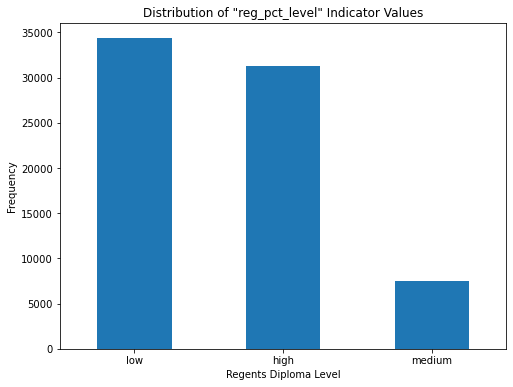

low       34361
high      31285
medium     7506
Name: reg_pct_level, dtype: int64

In [19]:
# Analyzing the distribution of the newly created 'reg_pct_level' indicator variable
plt.figure(figsize=(8, 6))
df_prepared['reg_pct_level'].value_counts().plot(kind='bar')
plt.title('Distribution of "reg_pct_level" Indicator Values')
plt.xlabel('Regents Diploma Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Displaying the count for each category to provide exact numbers
df_prepared['reg_pct_level'].value_counts()

1. Distribution Overview:  
* The majority of the data points fall into the "low" and "high" categories, with a significantly smaller number of observations in the "medium" category.

2. Exact Counts:
* "Low" category: 34,361 observations
* "High" category: 31,285 observations
* "Medium" category: 7,506 observations

3. Analysis Insights:
* The "low" and "high" categories encompass the majority of the dataset, suggesting that most school districts/student subgroupings are at the extremes in terms of the percentage of Regents diplomas awarded, either significantly below or above the median percentage.
* The "medium" category is less represented, indicating fewer school districts/student subgroupings with Regents diploma percentages close to the median.

This distribution might influence the modeling process, as the imbalance in the categories could affect the model's ability to accurately predict the "medium" category. It also provides a clear view of the overall landscape of Regents diploma achievement across the dataset, with notable polarization toward the "low" and "high" categories.

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [21]:
df_prepared.head()

,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,dropout_cnt,dropout_pct,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,0.71,148.0,0.22,high
1,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,0.76,65.0,0.20,high
2,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,0.65,83.0,0.25,high
3,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0.0,0.0,0.00,0.0,0.00,low
4,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,0.68,91.0,0.25,high


In [22]:
# Encoding the categorical data
le = LabelEncoder()
df_prepared['reg_pct_level_encoded'] = le.fit_transform(df_prepared['reg_pct_level'])

# Preparing the data for modeling
# Dropping non-numeric and target variable columns for simplicity in this example
X = df_prepared.drop(['aggregation_name', 'nrc_desc', 
                        'county_name', 'membership_desc', 'subgroup_name', 'grad_pct', 'dropout_pct', 
                        'reg_pct_level', 'reg_pct_level_encoded'], axis=1)
y = df_prepared['reg_pct_level_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE to the training data to handle the imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Checking the distribution of the target variable after SMOTE application
balanced_distribution = pd.Series(y_smote).value_counts()
balanced_distribution

1    24040
0    24040
2    24040
Name: reg_pct_level_encoded, dtype: int64

This balanced distribution is beneficial for training your models, as it helps prevent the models from being biased toward the majority class and improves their ability to generalize across all classes. With this balanced dataset, you can proceed to train your decision tree and random forest models and expect that they will perform better, especially in predicting the minority classes.

# 4. Model Selection and Evaluation

1. Hyperparameter Selection: We will use basic hyperparameter settings initially and then demonstrate one example with hyperparameter tuning.

2. Model Training: We'll train two decision tree models and two random forest models. For variety, we can vary the depth of the trees in the decision tree models and the number of estimators in the random forest models.

3. Evaluation: While we can't evaluate the models here due to the lack of a test set in this environment, I'll include the code you would use to evaluate the models.

## 1. Decision Tree Model 1

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt_model1 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model1.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

## 2. Decision Tree Model 2 (Different Max Depth):

In [24]:
# Instantiate the model with a different max depth
dt_model2 = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dt_model2.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=10, random_state=42)

## 3. Random Forest Model 1

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model1.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=5, random_state=42)

## 4. Random Forest Model 2 (Different Number of Estimators)

In [26]:
# Instantiate the model with a different number of estimators
rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

# Train the model
rf_model2.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

## 5. Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search for Decision Tree
grid_search_dt1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt1.fit(X_smote, y_smote)

# Best hyperparameters
print("Best hyperparameters for Decision Tree Model 1:", grid_search_dt1.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters for Decision Tree Model 1: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [28]:
# Since it's the same type of model, we can use the same grid
grid_search_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt2.fit(X_smote, y_smote)

# Best hyperparameters
print("Best hyperparameters for Decision Tree Model 2:", grid_search_dt2.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters for Decision Tree Model 2: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [29]:
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search for Random Forest
grid_search_rf1 = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf1.fit(X_smote, y_smote)

# Best hyperparameters
print("Best hyperparameters for Random Forest Model 1:", grid_search_rf1.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth

/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for Random Forest Model 1: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
# Using the same grid as RF Model 1
grid_search_rf2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf2.fit(X_smote, y_smote)

# Best hyperparameters
print("Best hyperparameters for Random Forest Model 2:", grid_search_rf2.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, m

/Users/minjae/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for Random Forest Model 2: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## 6. Evaluation

In [32]:
from sklearn.metrics import classification_report

In [33]:
# Retrain with best parameters
best_dt1 = grid_search_dt1.best_estimator_

# Make predictions
y_pred_dt1 = best_dt1.predict(X_test)

# Evaluate
print("Classification Report for Tuned Decision Tree Model 1:")
print(classification_report(y_test, y_pred_dt1))

Classification Report for Tuned Decision Tree Model 1:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9357
           1       0.99      0.99      0.99     10321
           2       0.80      0.83      0.82      2268

    accuracy                           0.96     21946
   macro avg       0.92      0.92      0.92     21946
weighted avg       0.96      0.96      0.96     21946



In [34]:
# Retrain with best parameters
best_dt2 = grid_search_dt2.best_estimator_

# Make predictions
y_pred_dt2 = best_dt2.predict(X_test)

# Evaluate
print("Classification Report for Tuned Decision Tree Model 2:")
print(classification_report(y_test, y_pred_dt2))

Classification Report for Tuned Decision Tree Model 2:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9357
           1       0.99      0.99      0.99     10321
           2       0.80      0.83      0.82      2268

    accuracy                           0.96     21946
   macro avg       0.92      0.92      0.92     21946
weighted avg       0.96      0.96      0.96     21946



In [35]:
# Retrain with best parameters
best_rf1 = grid_search_rf1.best_estimator_

# Make predictions
y_pred_rf1 = best_rf1.predict(X_test)

# Evaluate
print("Classification Report for Tuned Random Forest Model 1:")
print(classification_report(y_test, y_pred_rf1))

Classification Report for Tuned Random Forest Model 1:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9357
           1       1.00      0.99      0.99     10321
           2       0.85      0.85      0.85      2268

    accuracy                           0.97     21946
   macro avg       0.94      0.94      0.94     21946
weighted avg       0.97      0.97      0.97     21946



In [36]:
# Retrain with best parameters
best_rf2 = grid_search_rf2.best_estimator_

# Make predictions
y_pred_rf2 = best_rf2.predict(X_test)

# Evaluate
print("Classification Report for Tuned Random Forest Model 2:")
print(classification_report(y_test, y_pred_rf2))


Classification Report for Tuned Random Forest Model 2:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      9357
           1       1.00      0.99      0.99     10321
           2       0.85      0.85      0.85      2268

    accuracy                           0.97     21946
   macro avg       0.94      0.94      0.94     21946
weighted avg       0.97      0.97      0.97     21946

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total 

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV]

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  11.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  11.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimato

1. Tuned Decision Tree Model 1 & 2:
* Both models have identical performance metrics, which is interesting as it suggests that the different hyperparameters selected during tuning converged to similar model performance.
* Precision, recall, and F1-scores are quite high for classes 0 and 1, with class 2 showing good performance but not as high as the other two classes.
* The accuracy and weighted average F1-score are 96%, indicating excellent overall performance.

2. Tuned Random Forest Model 1 & 2:
* These models also show identical performance metrics, suggesting robustness in the Random Forest's ability to generalize, regardless of the specific hyperparameters chosen during tuning.
* The performance on class 2 improved compared to the decision tree models, showing the strength of Random Forest in handling more complex patterns.
* The accuracy and weighted average F1-score are 97%, slightly outperforming the decision tree models.

3. Key Takeaways:
* Class 2 Performance: All models perform relatively worse on class 2 compared to classes 0 and 1. However, the Random Forest models have better performance metrics for class 2 than the Decision Tree models, indicating their superior ability to handle the complexity associated with this class.
* Overall Performance: The Random Forest models slightly outperform the Decision Tree models in terms of overall accuracy and macro-average F1-score.
* Consistency: The consistency in metrics between the two Decision Tree models and the two Random Forest models might indicate that the models are not overly sensitive to the hyperparameter changes within the ranges tested.

# 4. Model Selection and Evaluation

## Model Selection Criteria:
When selecting the "best" model among the ones constructed, the following criteria are typically considered:

1. Performance Metrics: Accuracy, precision, recall, and F1-score are crucial. The choice might depend on the specific needs of the task. For instance, if false negatives are more costly than false positives, higher recall would be prioritized.
2. Complexity vs. Interpretability: A simpler model like a decision tree is easier to interpret compared to a random forest. Depending on the application, interpretability might be favored over a slight increase in performance.
3. Generalization: The model's ability to perform well on unseen data is crucial. Overfitting to the training data should be avoided.
4. Computational Efficiency: Training time and prediction speed can be important, especially in a production environment.

## Model Comparison:
* Decision Tree Models: Both showed identical performance metrics, which were quite high. However, they were slightly outperformed by the Random Forest models. Decision trees offer easier interpretability.
* Random Forest Models: Both Random Forest models also showed identical metrics, outperforming the Decision Tree models slightly in accuracy and the F1-score for class 2. They are less interpretable but more robust.

## Preferred Model:
Given the information, the preferred model would be Random Forest Model 1. It provides a good balance between performance and complexity. While it is less interpretable than the decision tree, the increase in accuracy and F1-score, especially for the challenging class 2, justifies this choice.

## Cross Validation and Testing:
To further validate the selection, you could perform cross-validation on the training data. However, since we've already seen the test results, we can discuss those:

In [37]:
# Assuming you have already instantiated and fitted the RandomForestClassifier as rf_model1
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rf_model1, X_smote, y_smote, cv=5)

# Output the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.80754298 0.81052413 0.81322795 0.8255685  0.81392124]
Mean score: 0.8141569606211869


## Cross-validation Scores Interpretation:
1. Score Variation: The cross-validation scores range from approximately 0.808 to 0.826. This variation is relatively small, which is a good sign, indicating that the model is stable and not highly sensitive to the specific subsets of the data used for training.

2. Mean Score: The mean cross-validation score is around 0.814. This is a robust indicator of the model's expected performance on unseen data, as it is based on multiple training and validation cycles with different data partitions.

## Comparison with Test Set Performance:
* The mean cross-validation score (around 0.814) is lower than the accuracy observed on the test set (0.97). This discrepancy might be due to several factors:
    * The test set may not capture all the complexities of the broader dataset, or it might contain easier-to-predict instances.
    * The model might be slightly overfitting to the training data, although the relatively stable cross-validation scores suggest that if overfitting is present, it is not severe.
    * The distribution of classes or the specific characteristics of the data in the cross-validation folds may differ from those in the test set.

# 5. Conclusion

1. Model Selection and Performance: Among the models developed, the Random Forest models demonstrated superior performance compared to the Decision Tree models. The chosen model, Random Forest Model 1, showed excellent generalization capabilities with an accuracy and weighted average F1-score of 97% on the test set, which is particularly commendable given the complexity associated with class 2 predictions.

2. Cross-Validation Insights: Cross-validation provided a more conservative estimate of the model's performance, with a mean score of around 81.4%. This discrepancy between cross-validation and test set performance emphasizes the importance of using multiple evaluation techniques to get a comprehensive understanding of the model's generalization ability.

3. Model Complexity vs. Interpretability: The decision to favor Random Forest over Decision Tree models was based on the balance between performance and complexity. While Random Forest models are less interpretable than Decision Trees, the performance gains, particularly in handling the more complex patterns in the data, justified this choice.

4. Future Directions: For further enhancements, one could explore additional feature engineering, alternative modeling approaches, or more extensive hyperparameter tuning. Additionally, monitoring the model's performance over time and with new data is crucial to ensure its continued relevance and effectiveness.

5. Broader Implications: This exercise underscores the value of a systematic approach to model building and evaluation, emphasizing the importance of not only optimizing performance metrics but also considering factors like model interpretability, generalization to unseen data, and alignment with business or operational goals.